# Data Science Process

## Table of Contents

[1. Summary](#1)<br>

[2. CRISP-DM: Cross-Industry Standard Process for Data Mining](#2)<br>

> [2.1 CRISP-DM: Business Understanding](#2.1)<br>
> [2.2. CRISP-DM: Data Understanding](#2.2)<br>
> [2.2.1 Exercise: A Look at the Data](#2.2.1)<br>

# <a id='2'>2. CRISP-DM: Cross-Industry Standard Process for Data Mining</a>

Even when we get into the weeds of coding, try to take a step back and realize what part of the process you are in, and assure that you remember the question you are trying answer and what a solution to that question looks like.

**Major Phases of CRISP-DM:**<br>
1. [Business Understanding](#2.1)<br>
2. [Data Understanding](#2.2)<br>
3. Prepare Data<br>
4. Data Modeling<br>
5. Evaluate the Results<br>
6. Deploy<br>

## <a id='2.1'>2.1. CRISP-DM: Business Understanding</a>

1. **Business Understanding**
> this means understanding the problem and questions you are interested in tackling in the context of whatever domain you're working in<br>

Examples include:<br>
>* How do we acquire new customers?<br>
>* Does a new treatment perform better than an existing treatment?<br>
>* How can improve communication?<br>
>* How can we improve travel?<br>
>* How can we better retain information?<br>

## <a id='2.2'>2.2. CRISP-DM: Data Understanding</a>

2. **Data Understanding**
> at this step, you need to gain an understanding of the data necessary to answer your question<br>

You might already have data that could be used to answer the questions, or you might have to collect data to get at your questions of interest.

### <a id='2.2.1'>2.2.1: Exercise: A Look at the Data</a>

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ALookAtTheData as t
from IPython import display
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0


As you work through the notebook(s) in this and future parts of this program, you will see some consistency in how to test your solutions to assure they match what we achieved!  In every environment, there is a solution file and a test file.  There will be checks for each solution built into each notebook, but if you get stuck, you may also open the solution notebook to see how we find any of the solutions.  Let's take a look at an example.

### Question 1

**1.** Provide the number of rows and columns in this dataset.

In [12]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

t.check_rows_cols(num_rows, num_cols) 

Nice job there are 19102 rows in the dataset!
Nice job there are 154 columns in the dataset!


In [13]:
# If we made a mistake - a different prompt will appear

flipped_num_rows = df.shape[1] #Provide the number of rows in the dataset
flipped_num_cols = df.shape[0] #Provide the number of columns in the dataset

t.check_rows_cols(flipped_num_rows, flipped_num_cols)

That doesn't look like what we were expecting for the number of rows.
That doesn't look like what we were expecting for the number of columns.


In [14]:
# If you want to know more about what the test function is expecting, 
# you can read the documentation the same way as any other funtion

t.check_rows_cols?

Signature: t.check_rows_cols(num_rows, num_cols)
Docstring:
INPUT:
num_rows - int the number of rows in df
num_cols - int the number of cols in df

This function will print a statement related to whether or not you provided the correct number of rows and columns of the dataset.
File:      ~/Git/udacity_nano_ds/01_lesson/ALookAtTheData.py
Type:      function


Now that you are familiar with how to test your code - let's have you answer your first question:

### Question 2

**2.** Which columns had no missing values? Provide a set of column names that have no missing values.

In [15]:
no_nulls = set(df.columns[df.isna().sum() == 0])

display.HTML(t.no_null_cols(no_nulls))

Nice job that looks right!


### Question 3

**3.** Which columns have the most missing values?  Provide a set of column names that have more than 75% if their values missing.

In [16]:
most_missing_cols = set(df.columns[df.isna().sum() / len(df) > 0.75])

t.most_missing_cols(most_missing_cols)

Nice job that looks right!


### Question 4

**4.** Provide a pandas series of the different **Professional** status values in the dataset along with the count of the number of individuals with each status.  Store this pandas series in **status_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each status.

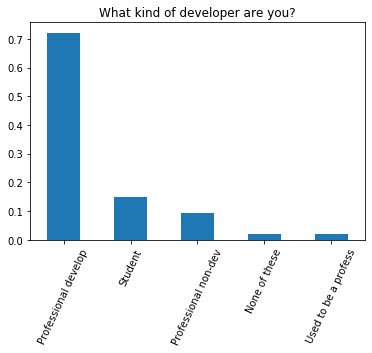

In [46]:
status_vals = df['Professional'].value_counts()

# The below should be a bar chart of the proportion of individuals in each professional category 
# if your status_vals is set up correctly.

(status_vals/df.shape[0]).plot(kind="bar")
plt.title("What kind of developer are you?")
plt.gca().set_xticklabels([col[:20] for col in status_vals.index], rotation = 65)
plt.show()

### Question 5

**5.** Provide a pandas series of the different **FormalEducation** status values in the dataset along with the count of how many individuals received that formal education.  Store this pandas series in **ed_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each status.

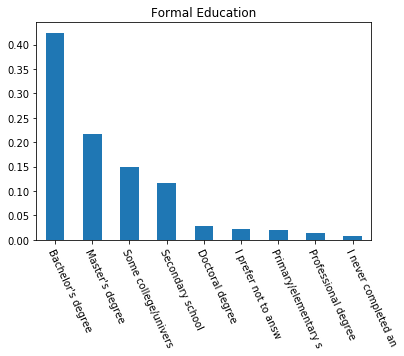

In [74]:
ed_vals = df['FormalEducation'].value_counts()

# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(ed_vals/df.shape[0]).plot(kind="bar")
plt.title("Formal Education")
ax.set_xticks(ticks=range(len(ed_vals.index)))
plt.gca().set_xticklabels(
    [col[:20] for col in ed_vals.index],
    rotation =-65, 
    rotation_mode='anchor',fontdict={'horizontalalignment': 'left'})
plt.tick_params(axis='x')
# plt.xlabel(labelpad=5)
plt.show()

### Question 6

**6.** Provide a pandas series of the different **Country** values in the dataset along with the count of how many individuals are from each country.  Store this pandas series in **count_vals**.  If you are correct, you should see a bar chart of the proportion of individuals in each country.

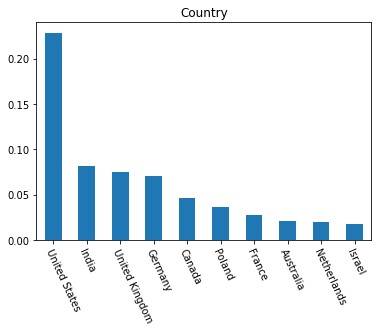

In [75]:
count_vals = df['Country'].value_counts()

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="bar")
plt.title("Country")
ax.set_xticks(ticks=range(len(count_vals.index)))
plt.gca().set_xticklabels(
    [col[:20] for col in count_vals.index],
    rotation =-65, 
    rotation_mode='anchor',fontdict={'horizontalalignment': 'left'})
plt.tick_params(axis='x')
# plt.xlabel(labelpad=5)
plt.show()

# Simplified 4-Step Process for Modeling using Scikit-Learn
1. Instantiate Model
> `model = Classifier()`
2. Fit model to training data
> `model.fit(X_train, y_train)`
3. Predict on test data with the fitted model
> `pred_test = model.predict(X_test)`
4. Score the model using a metric to evaluate how well it performs
> `fbeta_score(y_test, pred_test, beta=0.5)`

# Working With Missing Data
1. Remove
> We can remove (or “drop”) the rows or columns holding the missing values
2. Impute
> Replace with mean, median, mode of frequency, univariate linear regression, etc.
3. Work Around
> We can build models that work around them, and only use the information provided

Resource: [How to Handle Missing Data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)

## Option 1: Removing
1. Ask "Why are the values missing"
> Removing data can lead to biased models

Ex: If data is of survey nature, the types of questions NOT RESPONDED TO may indicate different types of respondents

May be valuable to account for the number of, or which questions have, missing values for each observation:

| Q1 | Q2  | Q3  | Missing |
|----|-----|-----|---------|
| 1  | Nan | 1   | 1       |
| 4  | 4   | Nan | 1       |
| 1  | 2   | 1   | 0       |

### When is it ok to remove missing values?
1. Data entry errors
2. Mechanical errors
3. Didn't need the data
4. The missing data is in the column to be predicted
5. There is no variablity in the observations

### Other Considerations
1. Drop observations
2. Drop columns

## Option 2: Imputing

Be very cautious of the BIAS you are imputing into any model that uses these imputed values.

Though imputing values is very common, and often leads to better predictive power in machine learning models, it can lead to **over generalizations**

* By imputing, you are diluting the importance of that feature
* Variablity in features is what allows you to use them to predict another variable well

**Common Methods:**
1. Mean
2. Median
3. Mode
> Especially with categorical data
4. Impute 0 or $\infty$
> Small or large value to differentiate missing values from the others

**More advanced:**
1. [K-Nearest Neighbors](https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)
> Impute values based on features that are most similar
2. [AMELIA](https://cran.r-project.org/web/packages/Amelia/Amelia.pdf)

**PROS OF IMPUTING**
* You **ARE NOT** removing rows

**CONS OF IMPUTING**
* You **ARE** diluting the power of your features to predict well by reducing variability in those features

Note that in the image, the pink values were missing and replaced with the mean values in the column. However, `child height` at `42` and at `57` are vastly different. Because of imputation though, these two observations are identical aside from the value to be predicted

<img src='impute_0.png'>

In general, you should try to be more careful with missing data in understanding the real world implications and reasons for why the missing values exist. At the same time, these solutions are very quick, and they enable you to get models off the ground. You can then iterate on your feature engineering to be more careful as time permits.

# Encoding of Categorical Variables
**One Hot Encoding (dummy variables, indicator variables)**
Rule of thumb:
* for any factor to be added (p -> p+1), there should be at least 10 observations for each (i.e. if you add two factos by including dummy variables, you should have 10x the number of variables, p, the data has after including the new variables)

Ex.
* n=100, p = 3
> currently 33 1/3 observation per-factor<br>
* if one p has 5 categories/levels -> n=100, p = 8 (assuming no base drop, which is wrong), no issue
> each factor now has 100 / 8 observations<br>
* if one p has 8 categories/levels -> n=100, p = 11 (assuming no base drop, which is wrong), there may be an issues
> each factor now has 100 / 11 observations, even if the base case is dropped, this is still a potential issue

Another rule of thumb:
* There should be at least $\sqrt{n}$ observations for any factor
> this leads to an equivalent amount of observations for each factor


# Overfitting
* When we are able to build a model that performs well on data it has seen before, but does not predict well in new situations